In [ ]:
import pandas as pd
df = pd.read_csv("train (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

![image.png](attachment:image.png)

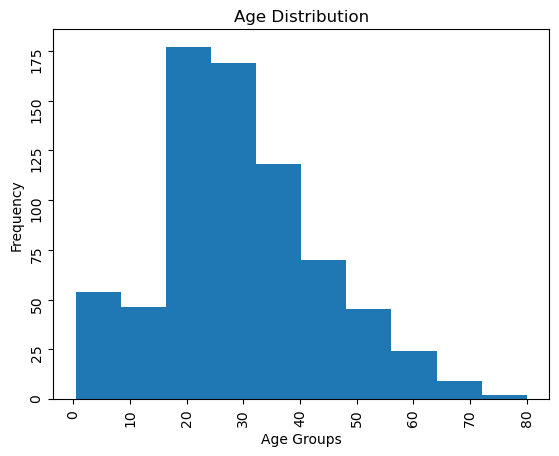

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df.Age)
plt.title("Age Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

MOst of the people has an age between 20 to 40.

In [ ]:
temp = df.Pclass.value_counts()
temp

3    491
1    216
2    184
Name: Pclass, dtype: int64

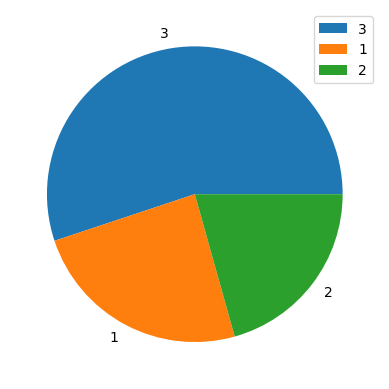

In [ ]:
plt.pie(x=temp.values, labels=temp.index)
plt.legend(temp.index)
plt.show()

In [ ]:
len(df)

891

In [ ]:
df.Sex.value_counts()    # Total

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
temp = df.groupby(["Sex"]).sum()["Survived"]
temp     #Obtained

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
male_per = (109/577)*100
female_per = (233/314)*100

male_per, female_per

(18.890814558058924, 74.20382165605095)

<BarContainer object of 2 artists>

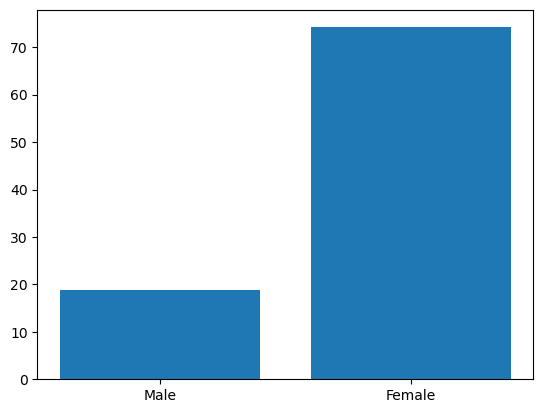

In [ ]:
plt.bar(x=["Male", "Female"], height=[male_per, female_per])

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
temp = df.Embarked.value_counts()
temp

S    644
C    168
Q     77
Name: Embarked, dtype: int64

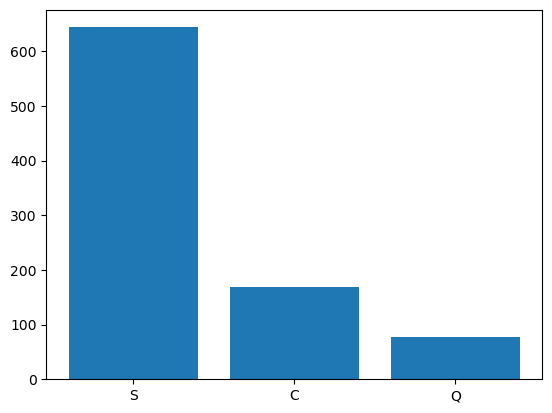

In [ ]:
plt.bar(x=temp.index,height=temp.values)
plt.show()

In [ ]:
temp = df.groupby(["Pclass"]).sum()["Survived"]
temp

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

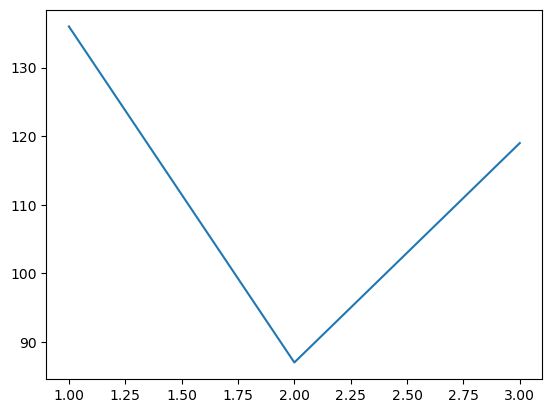

In [ ]:
plt.plot(temp.index, temp.values)
plt.show()

In [ ]:
df.Pclass.mean()

2.308641975308642

In [ ]:
df.groupby("Pclass").mean()["Fare"]

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

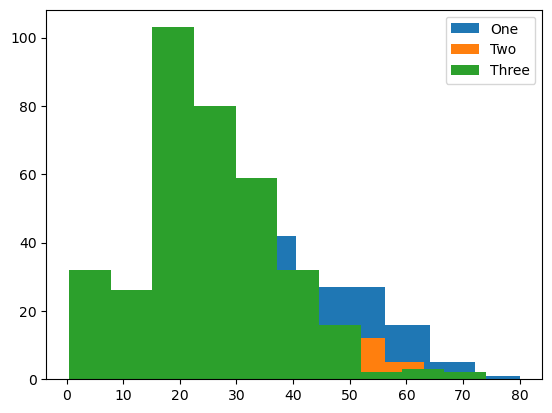

In [ ]:
plt.hist(df[df.Pclass == 1].Age.values, label="One")
plt.hist(df[df.Pclass == 2].Age.values, label="Two")
plt.hist(df[df.Pclass == 3].Age.values, label="Three")
plt.legend()
plt.show()

In [ ]:
df["Group"] = pd.cut(df.Age, 5, labels=[1,2,3,4,5])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2


In [ ]:
df.groupby("Group").sum()["Survived"]

Group
1     55
2    128
3     76
4     30
5      1
Name: Survived, dtype: int64